In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [44]:
df["quality"].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

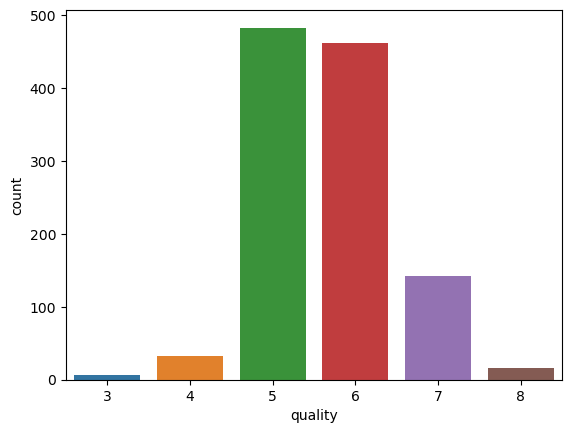

In [46]:
sns.countplot(x="quality", data = df)
plt.show()

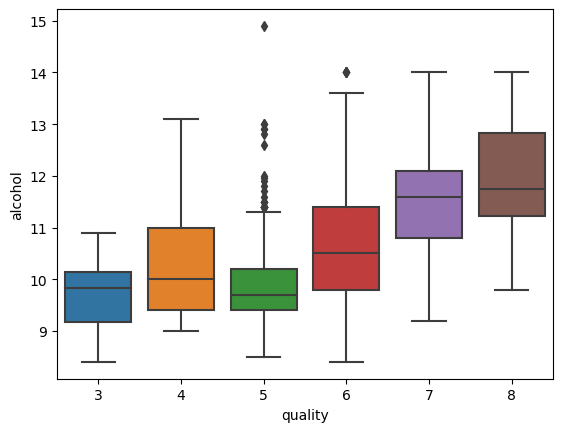

In [48]:
sns.boxplot(x="quality", y="alcohol", data=df)
plt.show()

In [49]:
x= df.drop(["quality",'Id'], axis=1)
y = df["quality"]

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [57]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [62]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
y_pred = model.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)*100

In [67]:
score

65.06550218340611

# Apply hyperparameter tuning to improve accuracy

In [68]:
from sklearn.model_selection import GridSearchCV

In [71]:
from pprint import pprint
rf = RandomForestClassifier()

pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [96]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

In [81]:
param_grid = {'bootstrap': [True,False],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth':  [8, 10, 12, 14],
 'max_features': [2, 3, 4, 5],
 'min_samples_leaf': [1,2, 3, 4, 5],
 'min_samples_split': [2, 4,6, 8, 10],
 'n_estimators': [50,100,150,200],
 'warm_start': [False,True]
              }

In [82]:
random_forest = RandomForestClassifier()

In [84]:
grid_search = GridSearchCV(estimator = random_forest, param_grid = param_grid, cv = 3, n_jobs=-1,verbose = 2 )

In [85]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 19200 candidates, totalling 57600 fits


C:\Users\91885\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
19200 fits failed out of a total of 57600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91885\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91885\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\91885\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\91885\anaconda3\lib\site-pac

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [8, 10, 12, 14],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200],
                         'warm_start': [False, True]},
             verbose=2)

In [87]:
best_grid = grid_search.best_estimator_

In [97]:
grid_accuracy = evaluate(best_grid, x_test, y_test)

Model Performance
Average Error: 0.3799 degrees.
Accuracy = 92.85%.


In [98]:
print(grid_accuracy)

92.8540237055521


In [102]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200,
 'warm_start': True}

In [104]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=2,
                       min_samples_split=4, n_estimators=200, warm_start=True)

# save gridsearchcv model